In [1]:
from datetime import datetime,timezone,timedelta
import os
import pickle

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import signal

from lib_data_process import libDataProcess as dapr
import lib_import_other_datasource as imoda

In [2]:
# code for check right time window and max elevation 
azimut_mask = [265,340]
min_height = 2.5
max_height = 3.5
sample_rate = 1
ts_dict = {20:{},30:{},40:{},50:{},60:{}}
count_ts = {20:{},30:{},40:{},50:{},60:{}}
snr_list = ['snr1','snr2','snr5','snr7','snr8']
path = os.path.abspath('../data/20230216/2_rotate/')
key = '0907_2'
st = datetime(year=2023,month=2,day=16,hour=7,minute=0,second=0,tzinfo=timezone.utc)
et = datetime(year=2023,month=2,day=16,hour=19,minute=0,second=0,tzinfo=timezone.utc)
for max_elevation in range(25,55):
    for t_range in range(15,45):
        elevation_mask = [5,max_elevation]
        dapr_case = dapr()
        ts_dict[max_elevation][t_range],count_ts[max_elevation][t_range] = dapr_case.generate_timeseries(path, azimut_mask, elevation_mask, min_height, max_height, t_range, st, et, snr_list, sample_rate)
result_dict = {'ts':ts_dict,'count':count_ts,'periodgram':dapr_case.power_list}
with open(f'../data/generated_data/normal_elevation_timerange_check.pkl', 'wb') as f:
    pickle.dump(result_dict, f)

KeyboardInterrupt: 

In [3]:
plt.rcParams.update({'font.size': 14})

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['2'] = float(index['antenne2'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['3'] = float(index['antenne3'])


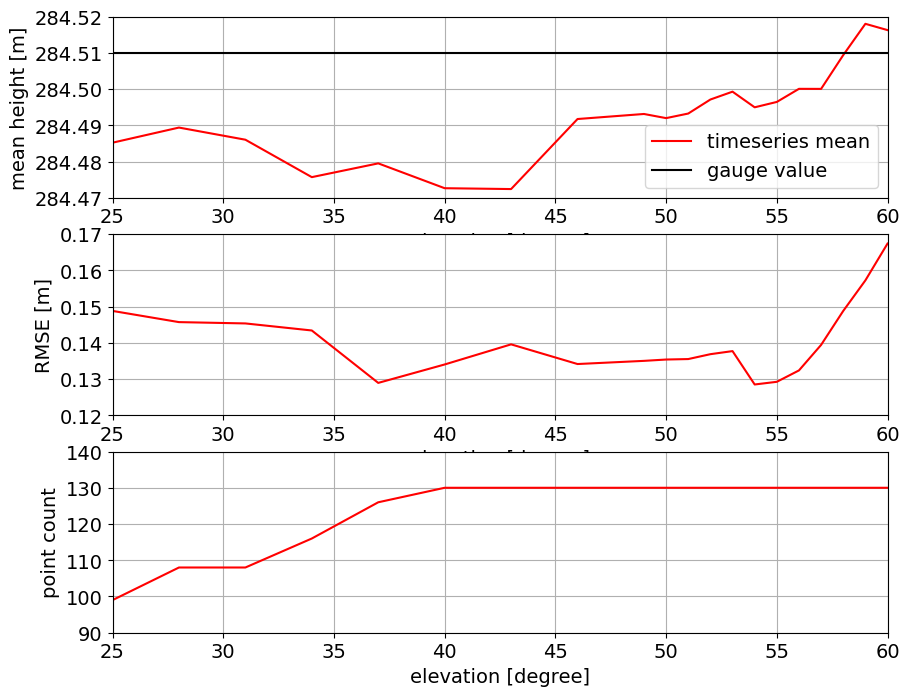

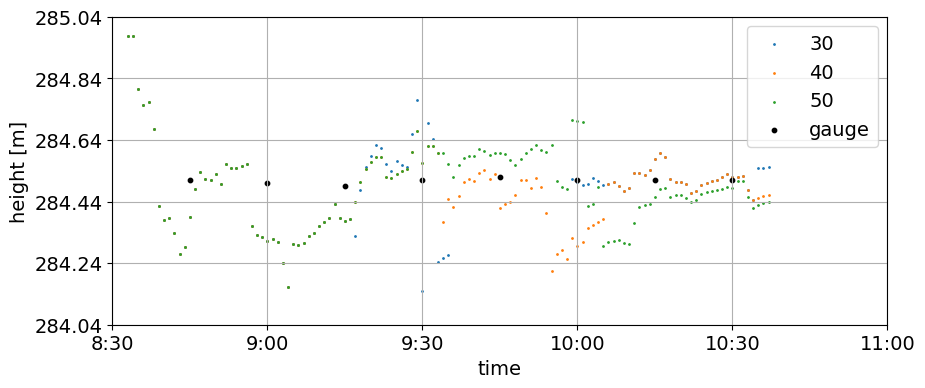

In [6]:
tbegin = datetime(year=2022,month=9,day=7,hour=8,minute=30,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,6):
    tticklist.append(tticklist[i-1]+timedelta(minutes=30))

anteheight = imoda.get_antenne_height('0907')
ante_h = round(anteheight['2'],2)
ts_gauge = imoda.get_gauge_data('0907')
gauge_h = round(np.mean(list(ts_gauge.values())),2)

with open('../data/generated_data/check_range/normal_elevation_check.pkl', 'rb') as f:
    ts_dict = pickle.load(f)
mean_dict = {}
rmse_dict = {}
count_dict = {}
for max_ele,ts in ts_dict['ts'].items():
    mean_dict[max_ele] = ante_h + 0.2 - np.nanmean(np.asarray(list(ts.values())))
    rmse_dict[max_ele] = np.sqrt(np.nanmean(np.square((ante_h + 0.2 - np.asarray(list(ts.values())))-gauge_h)))
    count_dict[max_ele] = len(list(ts.values()))
fig,ax = plt.subplots(3)
fig.set_size_inches(10,8)


ax[0].plot(list(mean_dict.keys()),list(mean_dict.values()),color='red')
ax[0].plot([20,65],[gauge_h,gauge_h],color='black')
ax[0].grid()
ax[0].set_ylabel('mean height [m]')
ax[0].set_xlabel('elevation [degree]')
ax[0].set_ylim([ante_h + 0.2 -3.07,ante_h + 0.2 -3.02])
ax[0].set_yticks(ante_h + 0.2 - np.asarray([3.02,3.03,3.04,3.05,3.06,3.07]))
ax[0].set_xlim([25,60])
ax[0].legend(['timeseries mean','gauge value'])

ax[1].plot(list(rmse_dict.keys()),list(rmse_dict.values()),color='red')
ax[1].grid()
ax[1].set_ylabel('RMSE [m]')
ax[1].set_xlabel('elevation [degree]')
ax[1].set_ylim([0.12,0.17])
ax[1].set_yticks([0.12,0.13,0.14,0.15,0.16,0.17])
ax[1].set_xlim([25,60])

ax[2].plot(list(count_dict.keys()),list(count_dict.values()),color='red')
ax[2].grid()
ax[2].set_ylabel('point count')
ax[2].set_xlabel('elevation [degree]')
ax[2].set_ylim([90,140])
ax[2].set_yticks([90,100,110,120,130,140])
ax[2].set_xlim([25,60])

fig.savefig('../../write/bilder/kapitel4/ normal_elevation_set.png')

fig2,ax2 = plt.subplots()
fig2.set_size_inches(10,4)
ax2.scatter(list(ts_dict['ts'][31].keys()),ante_h + 0.2 - np.asarray(list(ts_dict['ts'][31].values())),s=1)
ax2.scatter(list(ts_dict['ts'][40].keys()),ante_h + 0.2 - np.asarray(list(ts_dict['ts'][40].values())),s=1)
ax2.scatter(list(ts_dict['ts'][50].keys()),ante_h + 0.2 - np.asarray(list(ts_dict['ts'][50].values())),s=1)
ax2.scatter(list(ts_gauge.keys())[0:-3],list(ts_gauge.values())[0:-3],color='black',s=10)
ax2.set_xticks(tticklist)
ax2.set_xticklabels(['8:30','9:00','9:30','10:00','10:30','11:00'])
ax2.set_ylim([ante_h + 0.2 -3.5,ante_h + 0.2 -2.5])
ax2.set_yticks([ante_h + 0.2 -3.5,ante_h + 0.2 -3.3,ante_h + 0.2 -3.1,ante_h + 0.2 -2.9,ante_h + 0.2 -2.7,ante_h + 0.2 -2.5])
ax2.set_xlim([tticklist[0],tticklist[-1]])
ax2.legend(['30','40','50','gauge'])
ax2.grid()
ax2.set_xlabel('time')
ax2.set_ylabel('height [m]')
fig2.savefig('../../write/bilder/kapitel4/normal_elevation_example.png')